In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
dzero = pd.read_csv('../data/prices_round_3_day_0.csv', sep=';')
done = pd.read_csv('../data/prices_round_3_day_1.csv', sep=';')
dtwo = pd.read_csv('../data/prices_round_3_day_2.csv', sep=';')

In [4]:
bananas = pd.concat([dzero[dzero['product'] == 'BANANAS'], done[done['product'] == 'BANANAS'], dtwo[dtwo['product'] == 'BANANAS']], axis=0)
berries = pd.concat([dzero[dzero['product'] == 'BERRIES'], done[done['product'] == 'BERRIES'], dtwo[dtwo['product'] == 'BERRIES']], axis=0)

In [5]:
bananas.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
69965,2,999500,BANANAS,4791.0,28.0,NaN,NaN,NaN,NaN,4798.0,28.0,NaN,NaN,NaN,NaN,4794.5,134432.0
69973,2,999600,BANANAS,4792.0,30.0,NaN,NaN,NaN,NaN,4793.0,1.0,4797.0,4.0,4799.0,30.0,4792.5,131100.0
69982,2,999700,BANANAS,4792.0,28.0,NaN,NaN,NaN,NaN,4799.0,28.0,NaN,NaN,NaN,NaN,4795.5,127212.0
69989,2,999800,BANANAS,4793.0,1.0,4792.0,29.0,NaN,NaN,4799.0,29.0,NaN,NaN,NaN,NaN,4796.0,128340.0
69994,2,999900,BANANAS,4795.0,2.0,4792.0,25.0,NaN,NaN,4797.0,4.0,4799.0,25.0,NaN,NaN,4796.0,129364.0


In [6]:
berries.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
69970,2,999500,BERRIES,3904.0,61.0,NaN,NaN,NaN,NaN,3907.0,15.0,3911.0,20.0,3912.0,41.0,3905.5,-84316.0
69972,2,999600,BERRIES,3904.0,14.0,3903.0,41.0,NaN,NaN,3911.0,14.0,3912.0,41.0,NaN,NaN,3907.5,-83436.0
69985,2,999700,BERRIES,3904.0,13.0,3903.0,50.0,NaN,NaN,3911.0,13.0,3912.0,50.0,NaN,NaN,3907.5,-83340.0
69987,2,999800,BERRIES,3904.0,18.0,3903.0,53.0,NaN,NaN,3911.0,18.0,3912.0,53.0,NaN,NaN,3907.5,-82590.0
69997,2,999900,BERRIES,3905.0,19.0,3904.0,55.0,NaN,NaN,3912.0,74.0,NaN,NaN,NaN,NaN,3908.5,-85040.0


In [7]:
x = lambda y: np.arange(0, y * 100, 1)
x100 = lambda y: np.arange(0, y * 100, 100)

In [8]:
bananas['ema'] = bananas['mid_price'].ewm(span=20, min_periods=0, adjust=False).mean()
vars = []
count = 1
for i, row in bananas.iterrows():
    var = 0

    if count < 20:
        var = np.sum(np.power(bananas['ema'][:count] - bananas['mid_price'][:count], 2))
        vars.append(var / count)
    else:
        var = np.sum(np.power(bananas['ema'][count-20:count] - bananas['mid_price'][count-20:count], 2))
        vars.append(var / 20)
    
    count += 1

1.6506909610622944
1.7558868557281455


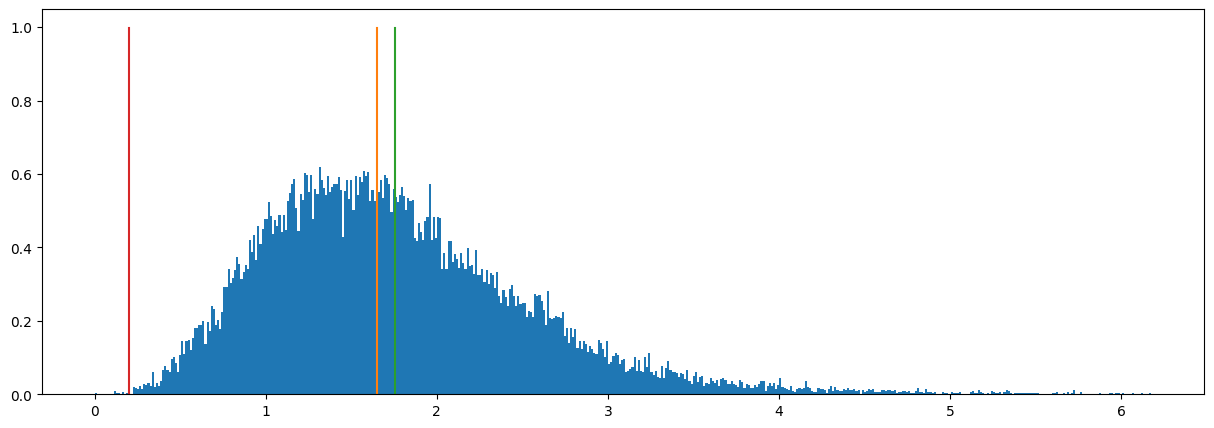

In [9]:
med = np.median(vars)
print(med)
mnijef = np.mean(vars)
print(mnijef)
plt.hist(vars, 500, density=True)
plt.plot(np.array([med] * 1000), np.arange(0, 1, 0.001))
plt.plot(np.array([mnijef] * 1000), np.arange(0, 1, 0.001))
plt.plot(np.array( [0.2]* 1000), np.arange(0, 1, 0.001))
plt.show()

In [10]:
np_vars = np.array(vars)
no_zero = np_vars[np_vars != 0]
mean_var = np.sum(np.log(no_zero)) / len(no_zero)
mean_var

0.46552992569812635

In [11]:
sigma_balls = np.sum(np.power(np.log(no_zero) - mean_var, 2)) / len(no_zero)
sigma_balls

0.20787284086329727

In [12]:
std_dev = np.sqrt(sigma_balls)
print(std_dev)

0.4559307413010196


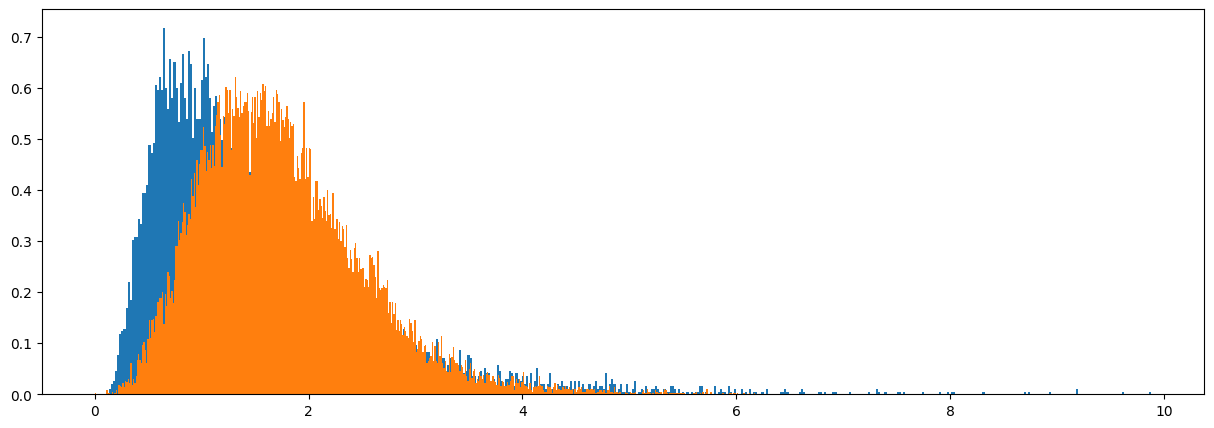

In [13]:
sim_var = [np.exp(np.random.normal(loc=0.2013577184710968, scale=0.6244283309726839)) for i in range(10000)]
plt.hist(sim_var, bins=500, density=True)
plt.hist(vars, bins=500, density=True)
plt.show()

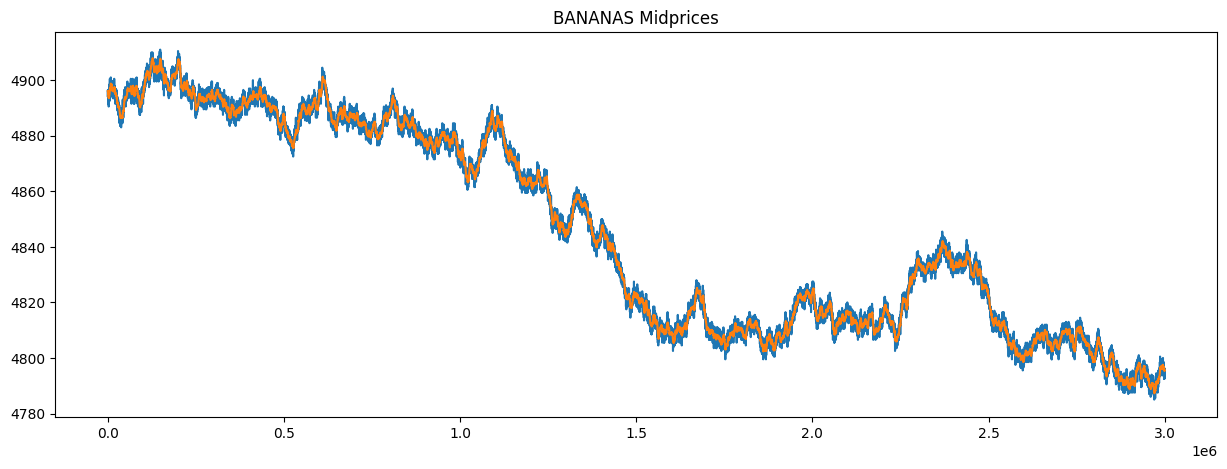

In [14]:
plt.plot(x100(len(bananas)), bananas['mid_price'])
plt.plot(x100(len(bananas)), bananas['ema'])
plt.title('BANANAS Midprices')
plt.show()

In [15]:
trades_d0 = pd.read_csv('../data/trades_round_3_day_0_nn.csv', sep=';')
trades_d1 = pd.read_csv('../data/trades_round_3_day_1_nn.csv', sep=';')
trades_d2 = pd.read_csv('../data/trades_round_3_day_2_nn.csv', sep=';')

trades = pd.concat([trades_d0, trades_d1, trades_d2])
trades = trades[trades['symbol'] == 'BANANAS']
trades.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
5,400,NaN,NaN,BANANAS,SEASHELLS,4899.0,9
6,500,NaN,NaN,BANANAS,SEASHELLS,4899.0,1
11,1400,NaN,NaN,BANANAS,SEASHELLS,4891.0,1
13,1500,NaN,NaN,BANANAS,SEASHELLS,4896.0,1
15,2200,NaN,NaN,BANANAS,SEASHELLS,4896.0,16


In [16]:
new_bananas = bananas.fillna(0)
new_bananas.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ema
4,0,0,BANANAS,4893.0,1.0,4892.0,30.0,0.0,0.0,4899.0,30.0,0.0,0.0,0.0,0.0,4896.0,0.0,4896.000000
13,0,100,BANANAS,4892.0,31.0,0.0,0.0,0.0,0.0,4896.0,7.0,4898.0,31.0,0.0,0.0,4894.0,0.0,4895.809524
20,0,200,BANANAS,4892.0,22.0,0.0,0.0,0.0,0.0,4899.0,22.0,0.0,0.0,0.0,0.0,4895.5,0.0,4895.780045
25,0,300,BANANAS,4893.0,25.0,0.0,0.0,0.0,0.0,4899.0,2.0,4900.0,23.0,0.0,0.0,4896.0,0.0,4895.800993
32,0,400,BANANAS,4894.0,5.0,4893.0,25.0,0.0,0.0,4899.0,25.0,0.0,0.0,0.0,0.0,4896.5,0.0,4895.867565


In [17]:
volume = 0
count = 0

for i, row in new_bananas.iterrows():
    volume += row['bid_volume_1'] + row['bid_volume_2'] + row['bid_volume_3'] + row['ask_volume_1'] + row['ask_volume_2'] + row['bid_volume_3']
    count += 1

avg_order_size = volume / count

In [18]:
sizes = []

for i, row in new_bananas.iterrows():
    sizes.extend([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'], row['ask_volume_1'], row['ask_volume_2'], row['bid_volume_3']])

print(sizes)

[1.0, 30.0, 0.0, 30.0, 0.0, 0.0, 31.0, 0.0, 0.0, 7.0, 31.0, 0.0, 22.0, 0.0, 0.0, 22.0, 0.0, 0.0, 25.0, 0.0, 0.0, 2.0, 23.0, 0.0, 5.0, 25.0, 0.0, 25.0, 0.0, 0.0, 24.0, 0.0, 0.0, 24.0, 0.0, 0.0, 26.0, 0.0, 0.0, 9.0, 26.0, 0.0, 7.0, 27.0, 0.0, 27.0, 0.0, 0.0, 26.0, 0.0, 0.0, 26.0, 0.0, 0.0, 2.0, 27.0, 0.0, 29.0, 0.0, 0.0, 28.0, 0.0, 0.0, 2.0, 26.0, 0.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 9.0, 30.0, 0.0, 30.0, 0.0, 0.0, 1.0, 27.0, 0.0, 4.0, 28.0, 0.0, 1.0, 24.0, 0.0, 26.0, 0.0, 0.0, 1.0, 2.0, 20.0, 22.0, 0.0, 20.0, 23.0, 0.0, 0.0, 23.0, 0.0, 0.0, 27.0, 0.0, 0.0, 2.0, 27.0, 0.0, 2.0, 25.0, 0.0, 27.0, 0.0, 0.0, 31.0, 0.0, 0.0, 31.0, 0.0, 0.0, 26.0, 0.0, 0.0, 7.0, 1.0, 0.0, 23.0, 0.0, 0.0, 23.0, 0.0, 0.0, 2.0, 30.0, 0.0, 32.0, 0.0, 0.0, 2.0, 22.0, 0.0, 24.0, 0.0, 0.0, 3.0, 6.0, 23.0, 25.0, 0.0, 23.0, 21.0, 0.0, 0.0, 5.0, 1.0, 0.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 10.0, 24.0, 0.0, 25.0, 0.0, 0.0, 1.0, 5.0, 29.0, 29.0, 0.0, 29.0, 25.0, 0.0, 0.0, 25.0, 0.0, 0.0, 31.0, 0.0, 0.0, 31.0, 0.0, 0.0, 27.0,

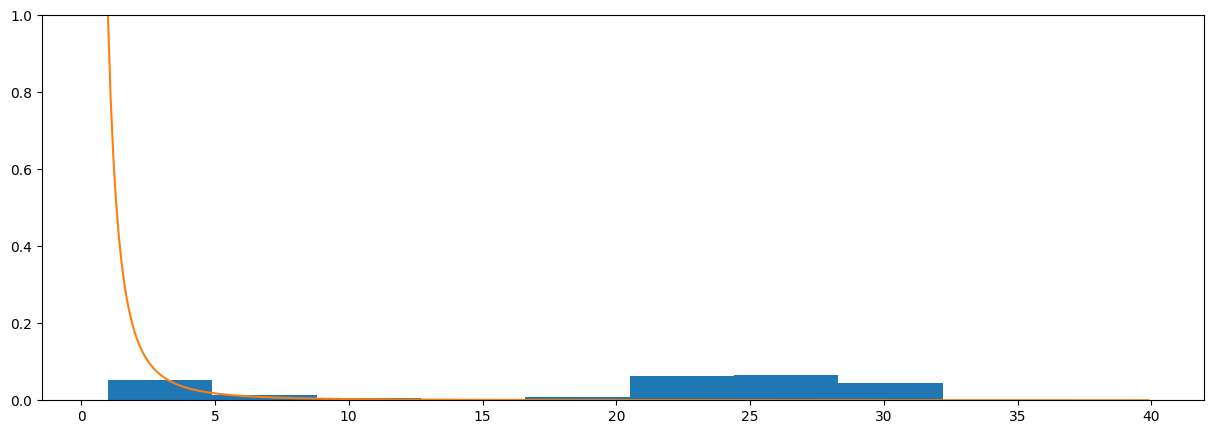

In [19]:
order_sizes = np.array(sizes)
order_sizes = order_sizes[order_sizes != 0]

plt.hist(order_sizes, density=True)
x = np.arange(0.5, 40, 0.1)
plt.plot(x, np.power(x, -1 - 1.5))
plt.ylim((0, 1))
plt.show()

In [20]:
freq = np.sum(trades['quantity']) / avg_order_size
freq

439.48778234326875

In [21]:
berries['ema'] = berries['mid_price'].ewm(span=20, min_periods=0, adjust=False).mean()
vars = []
count = 1
for i, row in berries.iterrows():
    var = 0

    if count < 20:
        var = np.sum(np.power(berries['ema'][:count] - berries['mid_price'][:count], 2))
        vars.append(var / count)
    else:
        var = np.sum(np.power(berries['ema'][count-20:count] - berries['mid_price'][count-20:count], 2))
        vars.append(var / 20)
    
    count += 1

In [22]:
print(np.mean(vars))

1.4852909125137501


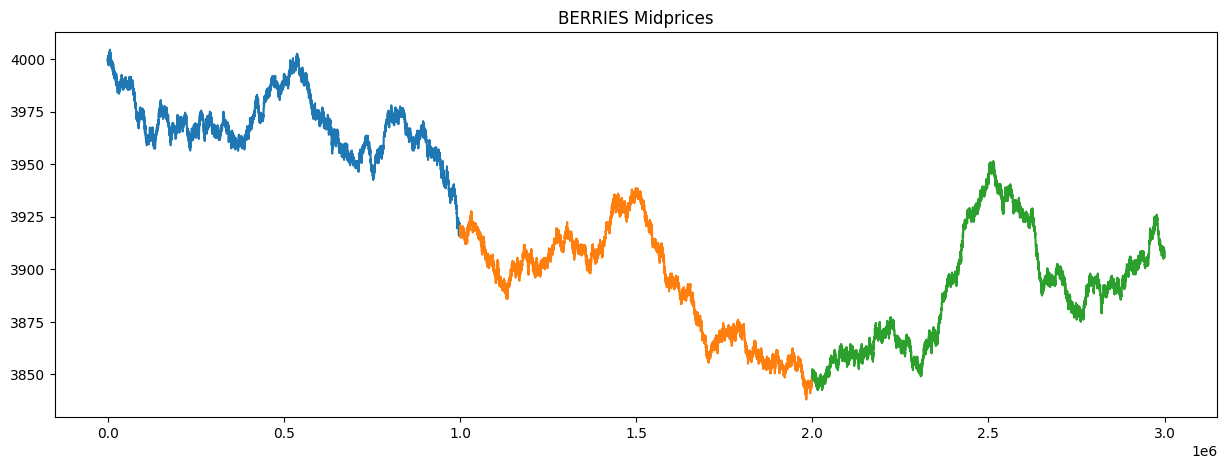

In [26]:
# plt.plot(x100(len(berries)), berries['mid_price'])
# plt.plot(np.arange(0, len()))
plt.plot(np.arange(0, 1000000, 100), dzero[dzero['product'] == 'BERRIES']['mid_price'])
plt.plot(np.arange(1000000, 2000000, 100), done[done['product'] == 'BERRIES']['mid_price'])
plt.plot(np.arange(2000000, 3000000, 100), dtwo[dtwo['product'] == 'BERRIES']['mid_price'])
plt.title('BERRIES Midprices')
plt.show()